# <center> <font color=#102C54> <i> Transformers - Trading </font> </center> </i>

<img style="float: left;;" src='https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg' width="80" height="160"/></a>
    
<i><center> **Trading Microstructure**  
    <center> Claudia Valeria Chimal Parra 
    <center> Paulo Cesar Ayala Gutiérrez
    <center> Juan Carlos Gutiérrez Valdivia
    <center> Oscar Leonardo Vaca González
    <center> Arturo Espinosa Carabez
        
   <center> May 5th, 2024 

# Classification With Transformers

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta
import warnings

warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv("./data/aapl_5m_train.csv").dropna()
data_test = pd.read_csv("./data/aapl_5m_test.csv").dropna()

## Normalizing Data

In [3]:
train_mean = data_train.loc[:, ["Open", "High", "Low", "Close"]].mean()
train_std = data_train.loc[:, ["Open", "High", "Low", "Close"]].std()

norm_data_train = (data_train.loc[:, ["Open", "High", "Low", "Close"]] - train_mean) / train_std
norm_data_test = (data_test.loc[:, ["Open", "High", "Low", "Close"]] - train_mean) / train_std

## Generating our features

In [4]:
norm_data_train = pd.read_csv("data_train.csv")

norm_data_test = pd.read_csv("data_test.csv")

In [34]:
lags = 5

X_train = pd.DataFrame()
X_test = pd.DataFrame()

for lag in range(lags):
    # Add original features with lags
    X_train[f"Close_{lag}"] = norm_data_train.Close.shift(lag)
    
    X_test[f"Close_{lag}"] = norm_data_test.Close.shift(lag)

for i in range(15):  # Suponiendo que tienes 15 configuraciones de cada indicador
    X_train[f'rsi_{i}'] = norm_data_train[f'rsi_{i}']
    X_train[f'wma_{i}'] = norm_data_train[f'wma_{i}']
    X_train[f'macd_{i}'] = norm_data_train[f'macd_{i}']
    X_train[f'bollinger_mavg_{i}'] = norm_data_train[f'bollinger_mavg_{i}']

    X_test[f'rsi_{i}'] = norm_data_test[f'rsi_{i}']
    X_test[f'wma_{i}'] = norm_data_test[f'wma_{i}']
    X_test[f'macd_{i}'] = norm_data_test[f'macd_{i}']
    X_test[f'bollinger_mavg_{i}'] = norm_data_test[f'bollinger_mavg_{i}']
    

    

# Cálculo de las variables objetivo para el entrenamiento y prueba
Y_train = np.where(X_train['Close_0'].shift(-5) > X_train['Close_0'] * (1.01), 2,
                   np.where(X_train['Close_0'].shift(-5) < X_train['Close_0'] * (0.99), 1, 0))
Y_train = pd.DataFrame(Y_train, index=X_train.index)

Y_test = np.where(X_test['Close_0'].shift(-5) > X_test['Close_0'] * (1.01), 2,
                  np.where(X_test['Close_0'].shift(-5) < X_test['Close_0'] * (0.99), 1, 0))
Y_test = pd.DataFrame(Y_test, index=X_test.index)

# Removing NaNs and the last value due to shifting
#X_train.dropna(inplace=True)
copy_train = X_train.copy()
copy_test = X_test.copy()
#X_test.dropna(inplace=True)
X_train = X_train.iloc[lags:-1, :].values
X_test = X_test.iloc[lags:-1, :].values
copy_train = copy_train.iloc[lags:-1, :]
copy_test = copy_test.iloc[lags:-1, :]

Y_train = Y_train.iloc[lags:-1].values.reshape(-1, 1)
Y_test = Y_test.iloc[lags:-1].values.reshape(-1, 1)

In [31]:
copy_test

,Close_0,Close_1,Close_2,Close_3,Close_4,rsi_0,wma_0,macd_0,bollinger_mavg_0,rsi_1,...,macd_12,bollinger_mavg_12,rsi_13,wma_13,macd_13,bollinger_mavg_13,rsi_14,wma_14,macd_14,bollinger_mavg_14
0,-1.478434,NaN,NaN,NaN,NaN,0.792148,-2.742081,0.006114,-2.756417,0.504740,...,-0.615192,-2.763841,-1.616672,-2.777990,-0.673713,-2.764021,-1.726145,-2.777478,-0.732133,-2.764409
1,-1.479874,-1.478434,NaN,NaN,NaN,0.665177,-2.738839,0.055258,-2.756222,0.444022,...,-0.559465,-2.762768,-1.632183,-2.777929,-0.617547,-2.763581,-1.741445,-2.777871,-0.675600,-2.763784
2,-1.455836,-1.479874,-1.478434,NaN,NaN,1.444058,-2.729699,0.193889,-2.754316,1.072255,...,-0.462415,-2.760880,-1.268429,-2.777211,-0.521997,-2.761889,-1.377233,-2.777594,-0.581463,-2.762723
3,-1.473914,-1.455836,-1.479874,-1.478434,NaN,0.263451,-2.728671,0.222904,-2.752786,0.362462,...,-0.411233,-2.759416,-1.465538,-2.776924,-0.469936,-2.760548,-1.571567,-2.777641,-0.528637,-2.761557
4,-1.366086,-1.473914,-1.455836,-1.479874,-1.478434,1.755656,-2.696427,0.698264,-2.746487,1.858691,...,-0.156544,-2.754917,-0.102876,-2.773869,-0.224053,-2.756202,-0.200293,-2.775032,-0.290900,-2.757415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19345,2.889902,2.890225,2.892807,2.884549,2.888288,0.677162,1.166523,0.284265,1.154924,0.832774,...,-0.034464,1.149930,-0.437282,1.152169,-0.063485,1.149392,-0.466686,1.153865,-0.092182,1.148857
19346,2.881185,2.889902,2.890225,2.892807,2.884549,-0.415033,1.164151,0.252444,1.155502,0.106999,...,-0.027866,1.150698,-0.593057,1.152292,-0.055385,1.150347,-0.615810,1.153853,-0.082742,1.149818
19347,2.881850,2.881185,2.889902,2.890225,2.892807,-0.327055,1.162399,0.226529,1.156080,0.151719,...,-0.021126,1.151439,-0.580027,1.152459,-0.047245,1.151110,-0.603317,1.153878,-0.073342,1.150762
19348,2.872791,2.881850,2.881185,2.889902,2.890225,-1.109165,1.158112,0.164405,1.156340,-0.488439,...,-0.033117,1.151963,-0.739803,1.152420,-0.057030,1.151583,-0.756440,1.153720,-0.081118,1.151264


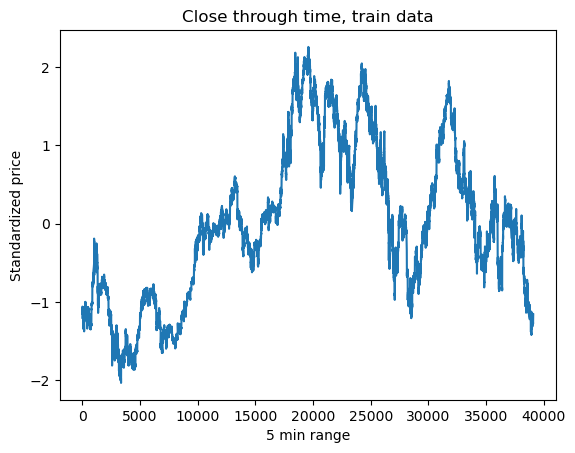

In [7]:
plt.plot(copy_train.index, copy_train.Close_0)
plt.xlabel('5 min range')
plt.ylabel('Standardized price')
plt.title('Close through time, train data')
plt.show()

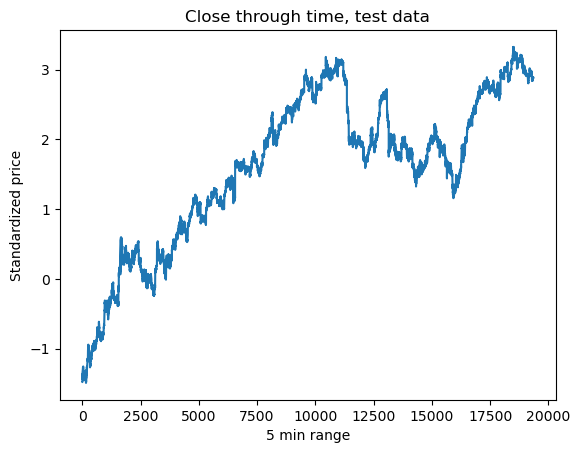

In [8]:
plt.plot(copy_test.index, copy_test.Close_0)
plt.xlabel('5 min range')
plt.ylabel('Standardized price')
plt.title('Close through time, test data')
plt.show()

In [9]:
Y_train_valid = pd.DataFrame(Y_train)
Y_test_valid = pd.DataFrame(Y_test)
print(Y_train_valid.value_counts())
print(Y_test_valid.value_counts())

2    20502
1    14727
0     3851
Name: count, dtype: int64
0    9230
2    5479
1    4635
Name: count, dtype: int64


## Reshaping Tensors

In [10]:
features = X_train.shape[1]

X_train = X_train.reshape(-1, features, 1)
X_test = X_test.reshape(-1, features, 1)

## Classification Model

In [11]:
def create_transformer(inputs, head_size, num_heads, dnn_dim):
    # Stacking layers
    l1 = tf.keras.layers.MultiHeadAttention(key_dim=head_size,
                                            num_heads=num_heads,
                                            dropout=0.2)(inputs, inputs)
    l2 = tf.keras.layers.Dropout(0.2)(l1)
    l3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(l2)
    
    res = l3 + inputs
    
    # Traditional DNN
    l4 = tf.keras.layers.Conv1D(filters=4, kernel_size=1, activation="relu")(res)
    l5 = tf.keras.layers.Dropout(0.2)(l4)
    l6 = tf.keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(l5)
    l7 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(l6)
    return l7 + res

In [12]:
input_shape = X_train.shape[1:]

# Hyperparams
head_size = 256
num_heads = 4
num_transformer_blocks = 4
dnn_dim = 4
units = 128


# Defining input_shape as Input layer
input_layer = tf.keras.layers.Input(input_shape)

# Creating our transformers based on the input layer
transformer_layers = input_layer

for _ in range(num_transformer_blocks):
    # Stacking transformers
    transformer_layers = create_transformer(inputs=transformer_layers,
                                            head_size=head_size,
                                            num_heads=num_heads,
                                            dnn_dim=dnn_dim)

# Adding global pooling
pooling_layer = tf.keras.layers.GlobalAveragePooling1D(data_format="channels_last")\
                                                      (transformer_layers)

# Adding MLP layers
l1 = tf.keras.layers.Dense(units=128, activation="leaky_relu")(pooling_layer)
l2 = tf.keras.layers.Dropout(0.3)(l1)
l3 = tf.keras.layers.Dense(units=128, activation="leaky_relu")(l2)

# Last layer, units = 3 for True and False values
outputs = tf.keras.layers.Dense(units=3, activation="softmax")(l3)

# Model
model = tf.keras.Model(inputs=input_layer,
                       outputs=outputs,
                       name="transformers_classification")

metric = tf.keras.metrics.SparseCategoricalAccuracy()
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
#callbacks = [tf.keras.callbacks.EarlyStopping(monitor="loss",
#                                              patience=10,
#                                              restore_best_weights=True)]

In [13]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=adam_optimizer,
    metrics=[metric],
)

In [14]:
model.summary()

Model: "transformers_classification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 65, 1)             │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention          │ (None, 65, 1)             │           7,169 │ input_layer[0][0],         │
│ (MultiHeadAttention)          │                           │                 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 65, 1)             │               0 │ multi_head_attention[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization           │ (None, 65, 1)             │               2 │ dropout_1[0][0]            │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 65, 1)             │               0 │ layer_normalization[0][0], │
│                               │                           │                 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d (Conv1D)               │ (None, 65, 4)             │               8 │ add[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 65, 4)             │               0 │ conv1d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_1 (Conv1D)             │ (None, 65, 1)             │               5 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_1         │ (None, 65, 1)             │               2 │ conv1d_1[0][0]             │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_1 (Add)                   │ (None, 65, 1)             │               0 │ layer_normalization_1[0][… │
│                               │                           │                 │ add[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention_1        │ (None, 65, 1)             │           7,169 │ add_1[0][0], add_1[0][0]   │
│ (MultiHeadAttention)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_4 (Dropout)           │ (None, 65, 1)             │               0 │ multi_head_attention_1[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_2         │ (None, 65, 1)             │               2 │ dropout_4[0][0]            │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_2 (Add)                   │ (None, 65, 1)             │               

 Total params: 45,899 (179.29 KB)

 Trainable params: 45,899 (179.29 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.save("transformer_classifier.keras")

In [16]:
model = tf.keras.models.load_model("transformer_classifier.keras")

In [17]:
y_hat_train = model.predict(X_train)

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 99s 81ms/step


In [18]:
sum(y_hat_train.argmax(axis=1) == 0)

39080

In [19]:
y_hat_test = model.predict(X_test)

605/605 ━━━━━━━━━━━━━━━━━━━━ 48s 80ms/step


In [20]:
sum(y_hat_train.argmax(axis=1) == 1)

0

In [57]:
sum(y_hat_test.argmax(axis=1) == 0)

19344

In [60]:
close_0_standardized = copy_test['Close_0']

# Utilizando la misma media y desviación estándar que para la columna "Close" de X_test
mean_close = train_mean["Close"]
std_close = train_std["Close"]

# Revertir la estandarización
close_0_original = close_0_standardized * std_close + mean_close

copy_test['Close_0'] = close_0_original

data_backtesting = copy_test

predicted_classes = y_hat_test.argmax(axis=1)

predicted_classes_series = pd.Series(predicted_classes).reset_index(drop=True)

data_backtesting['Predicted_Class'] = predicted_classes_series

data_backtesting.dropna(inplace=True)

data_backtesting

,Close_0,Close_1,Close_2,Close_3,Close_4,rsi_0,wma_0,macd_0,bollinger_mavg_0,rsi_1,...,bollinger_mavg_12,rsi_13,wma_13,macd_13,bollinger_mavg_13,rsi_14,wma_14,macd_14,bollinger_mavg_14,Predicted_Class
5,1.889906e+09,-1.366086,-1.473914,-1.455836,-1.479874,1.760890,-2.670910,1.065916,-2.740235,1.866037,...,-2.751150,-0.092326,-2.770808,-0.006186,-2.751813,-0.189627,-2.772362,-0.079140,-2.753171,0.0
6,1.882108e+09,-1.365118,-1.366086,-1.473914,-1.455836,0.607779,-2.663000,1.186589,-2.734836,0.929383,...,-2.748259,-0.485789,-2.768701,0.117220,-2.749149,-0.578506,-2.770533,0.043097,-2.749871,0.0
7,1.884179e+09,-1.401599,-1.365118,-1.366086,-1.473914,0.755683,-2.656869,1.307657,-2.729003,1.045962,...,-2.745043,-0.378886,-2.766358,0.242444,-2.746083,-0.470690,-2.768459,0.167257,-2.747030,0.0
8,1.880728e+09,-1.391914,-1.401599,-1.365118,-1.366086,0.272840,-2.659348,1.318412,-2.725365,0.667366,...,-2.742423,-0.545675,-2.764445,0.321158,-2.743402,-0.635650,-2.766765,0.247229,-2.744479,0.0
9,1.888871e+09,-1.408056,-1.391914,-1.401599,-1.365118,0.918972,-2.654408,1.472027,-2.721048,1.140757,...,-2.738366,-0.140227,-2.761586,0.458790,-2.739827,-0.226805,-2.764158,0.383402,-2.740873,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19339,2.797652e+09,2.868278,2.879248,2.878067,2.874819,0.714419,1.154900,0.109456,1.148883,0.732208,...,1.142226,-0.599974,1.150919,-0.271533,1.141824,-0.623386,1.153403,-0.300453,1.141383,0.0
19340,2.797518e+09,2.881838,2.868278,2.879248,2.878067,0.641330,1.156317,0.136299,1.150125,0.682648,...,1.143257,-0.610776,1.150902,-0.238750,1.142876,-0.633748,1.153268,-0.267640,1.142472,0.0
19341,2.799031e+09,2.881211,2.881838,2.868278,2.879248,1.068618,1.159461,0.184791,1.151197,1.018822,...,1.144671,-0.475853,1.151082,-0.196437,1.144068,-0.504156,1.153324,-0.225707,1.143680,0.0
19342,2.798232e+09,2.888288,2.881211,2.881838,2.868278,0.571386,1.160883,0.203942,1.152131,0.702464,...,1.145925,-0.541612,1.151190,-0.165873,1.145339,-0.567160,1.153312,-0.194919,1.144738,0.0


In [61]:
def backtesting_final(data):
    # Copia de los datos para evitar modificar el original
    data = data.copy()

    # Parámetros encontrados en proyecto 2 data 5 min:  1.084320935	0.914153619	43	95

    take_profit_multiplier = 1.084320935
    stop_loss_multiplier = 0.914153619
    n_shares_long = 43
    n_shares_short = 95

    # Inicializar variables para el backtesting
    cash = 1_000_000
    margin_account = 0  # Cuenta de margen para operaciones en corto
    active_operations = []
    history = []
    portfolio_value = []
    commission = 0.125 / 100
    margin_call = 0.25  # Porcentaje de margen requerido

    for i, row in data.iterrows():
        # Actualizar el margen necesario para las posiciones cortas
        margin_required = sum(op["n_shares"] * row.Close_0 * margin_call 
                              for op in active_operations if op["type"] == "short")

        if margin_required > margin_account:
            additional_margin_needed = margin_required - margin_account

            if cash >= additional_margin_needed:
                # Si hay suficiente efectivo, transferirlo a la cuenta de margen
                cash -= additional_margin_needed
                margin_account += additional_margin_needed
            else:
                # Si no hay suficiente efectivo, cerrar posiciones cortas hasta que el margen sea suficiente
                for operation in active_operations.copy():
                    if operation["type"] == "short":
                        profit = (operation["sold_at"] - row.Close_0) * operation["n_shares"]
                        cash += profit - (profit * commission)  # Ajustar por comisión
                        margin_account -= row.Close_0 * operation["n_shares"] * margin_call  # Liberar el margen reservado
                        cash+= operation["n_shares"] * row.Close_0 * margin_call
                        history.append({"operation": "closed short", "price": row.Close, "n_shares": operation["n_shares"]})
                        active_operations.remove(operation)
                        if sum(op["n_shares"] * row.Close_0 * margin_call for op in active_operations if op["type"] == "short") <= (margin_account+cash):
                            break  # Salir del bucle si el margen es suficiente

                        
        if margin_required < margin_account:
            excess_margin = margin_account - margin_required
            cash += excess_margin
            margin_account -= excess_margin

        # Cerrar operaciones largas y cortas según stop loss y take profit
        for operation in active_operations.copy():
            close_position = False
            if operation["type"] == "long":
                if row.Close_0 <= operation["stop_loss"] or row.Close_0 >= operation["take_profit"]:
                    cash += row.Close_0 * operation["n_shares"] * (1 - commission)
                    close_position = True
            elif operation["type"] == "short":
                if row.Close >= operation["stop_loss"] or row.Close_0 <= operation["take_profit"]:
                    cash += (operation["sold_at"] - row.Close_0) * operation["n_shares"] * (1 - commission)
                    margin_account -= operation["n_shares"] * row.Close_0 * margin_call
                    cash += operation["n_shares"] * row.Close_0 * margin_call
                    close_position = True

            if close_position:
                history.append({"operation": f"closed {operation['type']}", "price": row.Close_0, "n_shares": operation["n_shares"]})
                active_operations.remove(operation)

        # Abrir nuevas operaciones según las señales
        
        # Long
        if cash > row.Close_0 * n_shares_long * (1 + commission):
            if row.Predicted_Class == 2:  
                active_operations.append({
                    "bought_at": row.Close_0,
                    "type": "long",
                    "n_shares": n_shares_long,
                    "stop_loss": row.Close_0 * stop_loss_multiplier,
                    "take_profit": row.Close_0 * take_profit_multiplier
                })
                cash -= row.Close_0 * n_shares_long * (1 + commission)
                history.append({"operation": "opened long", "price": row.Close_0, "n_shares": n_shares_long})

        # Short
        required_margin_for_new_short = row.Close_0 * n_shares_short * margin_call
        if cash >= required_margin_for_new_short:  # Verificar si hay suficiente efectivo para el margen requerido
            if row.Predicted_Class == 1:  # Ejemplo de señal para operación corta
                active_operations.append({
                    "sold_at": row.Close_0,
                    "type": "short",
                    "n_shares": n_shares_short,
                    "stop_loss": row.Close_0 * stop_loss_multiplier,
                    "take_profit": row.Close_0 * take_profit_multiplier,
                })
                margin_account += required_margin_for_new_short
                cash -= required_margin_for_new_short  # Reservar efectivo para el margen
                history.append({"operation": "opened short", "price": row.Close_0, "n_shares": n_shares_short})

        # Actualizar el valor de la cartera
        asset_vals = sum([op["n_shares"] * row.Close_0 for op in active_operations if op["type"] == "long"])
        portfolio_value.append(cash + asset_vals + margin_account)

    final_portfolio_value = portfolio_value[-1]
    return final_portfolio_value, portfolio_value

In [62]:
final_portfolio_value, portfolio_value = backtesting_final(copy_test)

In [64]:
final_portfolio_value

1000000